# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [49]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [82]:
with open(output_data_file, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerow(['City', 'Cloudiness', 'Country', 'Date', 'Humidity','Lat','Lng','Max Temp','Wind Speed'])
    
    count = 0
    setcount = 1
    print('Beginning Data Retrieval\n-----------------------------')
    for city in cities:
        count += 1
        url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&APPID={api_key}"
        response = requests.get(url).json()

        if response['cod'] == '404':
            message = 'City not found. Skipping...'
        else:
            temp = response['main']['temp_max']
            maxtemp = (temp - 273.15) * 9/5 + 32
            message = f'Processing Record {count} of Set {setcount} | {city}'
            csvwriter.writerow([response['name'], response['clouds']['all'], response['sys']['country'], response['dt'], response['main']['humidity'], response['coord']['lat'], response['coord']['lon'], maxtemp, response['wind']['speed']])

        print(message)

        if count%50 == 0:
            setcount += 1

    print("-----------------------------\nData Retrieval Complete\n-----------------------------")
        
        

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | faanui
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | beyneu
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | wanning
Processing Record 6 of Set 1 | xuddur
City not found. Skipping...
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | luderitz
Processing Record 14 of Set 1 | sokolo
Processing Record 15 of Set 1 | rurrenabaque
Processing Record 16 of Set 1 | grand-lahou
Processing Record 17 of Set 1 | sola
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | cheyenne
Processing Record 20 of Set 1 | cap malheureux
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | ilulissat
Processing Record 23 of Set 1 | henties bay
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [83]:
weather_df = pd.read_csv(output_data_file, encoding="ISO-8859-1")
weather_df = weather_df.dropna(how='any')
weather_df.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

In [84]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Faanui,100,PF,1570415541,84,-16.48,-151.75,77.162,7.484
1,Vaini,40,IN,1570415249,94,15.34,74.49,71.600,1.060
2,Beyneu,1,KZ,1570415541,47,45.32,55.19,55.958,5.700
3,Saint-Philippe,75,CA,1570415250,87,45.36,-73.48,62.006,4.100
4,Wanning,75,AT,1570415213,87,48.64,13.53,46.004,4.100


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

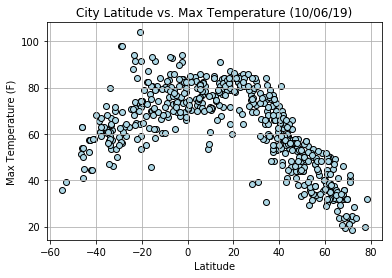

In [87]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], facecolors="lightblue", edgecolors="black")
plt.title('City Latitude vs. Max Temperature (10/06/19)')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('../images/temp_vs_lat.png')
plt.show()

#### Latitude vs. Humidity Plot

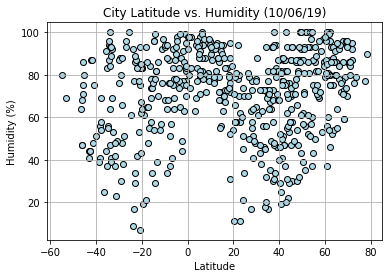

In [88]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], facecolors="lightblue", edgecolors="black")
plt.title('City Latitude vs. Humidity (10/06/19)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('../images/humidity_vs_lat.png')
plt.show()

#### Latitude vs. Cloudiness Plot

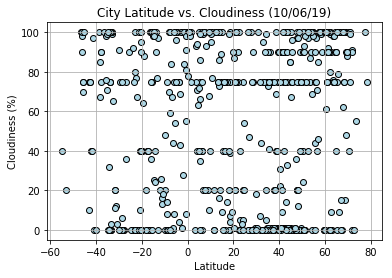

In [89]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], facecolors="lightblue", edgecolors="black")
plt.title('City Latitude vs. Cloudiness (10/06/19)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('../images/cloudiness_vs_lat.png')
plt.show()

#### Latitude vs. Wind Speed Plot

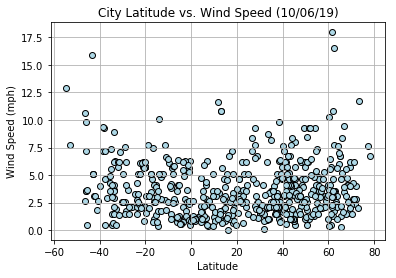

In [90]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], facecolors="lightblue", edgecolors="black")
plt.title('City Latitude vs. Wind Speed (10/06/19)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('../images/wind_speed_vs_lat.png')
plt.show()

## Observable Trends
* Despite the highest temperatures occuring between -40 and -20 degrees latitude, the distribution shows a central tendancy for the hottest cities to be at approximately 20 degrees latitude (i.e. not the equator) for this day, 10/06/19. 
* Wind speed appears to increase exponentially as the city nears closer to the south pole or the north pole. 
* From the lines of data points in the cloudiness plot, there is evidence to suggest that much of the data recorded was likely just a general estimation of the humidity (i.e. 0%, 20%, 40%, 75%, and 100%), while the rest of the data was recorded more precisely. 